In [1]:
# Import packages
from datetime import datetime
import pandas as pd
import numpy as np
import os

In [2]:
# Define directory to look at
data_dir = "./Data/"

# Let's have a look
os.listdir(data_dir)

['.DS_Store',
 'facilities.csv',
 'incidents.csv',
 'Overview_NMBS_data.png',
 'satisfaction.csv',
 'stations.csv',
 'stops.csv',
 'subscriptions.csv',
 'tickets.csv',
 'train_3605.png',
 'travelers.csv',
 'Trips']

In [3]:
# NOTE: 'Trips' is not a file, but a folder!
# NOTE: if you are working on a mac, you may have a .DS_Store file in your directory
# this is a hidden file that is created by macOS

# We can select a certain file type (here: .csv) by running the following command:
dir_list = [obs for obs in os.listdir(data_dir) if ".csv" in obs]
dir_list

['facilities.csv',
 'incidents.csv',
 'satisfaction.csv',
 'stations.csv',
 'stops.csv',
 'subscriptions.csv',
 'tickets.csv',
 'travelers.csv']

In [4]:
# Let's investigate one of the files in the Trips folder
trips = pd.read_csv("./Data/Trips/Trips_22_09_2025.csv", sep=';')
trips.head()

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
0,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:28:04,06:28:04,06:25:00,06:25:00,184.0,184.0,IC 29: GENT-SINT-PIETERS -> GENK,SCHAARBEEK,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22
1,2025-09-22,3605,IC 29,SNCB/NMBS,36N,06:34:58,06:34:58,06:32:00,06:32:00,178.0,178.0,IC 29: GENT-SINT-PIETERS -> GENK,KORTENBERG,36N,2025-09-22,2025-09-22,2025-09-22,2025-09-22
2,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:41:40,06:43:28,06:39:00,06:42:00,160.0,88.0,IC 29: GENT-SINT-PIETERS -> GENK,LEUVEN,36N,2025-09-22,2025-09-22,2025-09-22,2025-09-22
3,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:50:53,06:50:53,06:49:00,06:49:00,113.0,113.0,IC 29: GENT-SINT-PIETERS -> GENK,VERTRIJK,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22
4,2025-09-22,3605,IC 29,SNCB/NMBS,36,07:02:49,07:02:49,07:00:00,07:00:00,169.0,169.0,IC 29: GENT-SINT-PIETERS -> GENK,EZEMAAL,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22


In [7]:
import pandas as pd

# Groepeer per station en bereken gemiddelde vertraging bij aankomst en vertrek
avg_delay_per_station = (
    trips.groupby('Stopping place')[['Delay at arrival', 'Delay at departure']]
         .mean()
         .reset_index()
)

# Optioneel: sorteer op de grootste vertraging bij aankomst
avg_delay_per_station = avg_delay_per_station.sort_values('Delay at arrival', ascending=False)

# Resultaat tonen
print(avg_delay_per_station.head(100))


    Stopping place  Delay at arrival  Delay at departure
281     IZEGEM-SAS        622.528571          622.528571
280         IZEGEM        616.357143          638.257143
256     HERGENRATH        570.190476          573.968254
279   INGELMUNSTER        549.657143          564.128571
18   ANTWERPEN-DAM        469.500000          469.500000
..             ...               ...                 ...
97   BRUSSEL-NOORD        190.219739          188.169460
326        LEIGNON        190.212121          196.712121
259       HERSEAUX        190.031746          216.222222
332         LEUVEN        189.775000          161.073375
336      LIBRAMONT        189.720000          151.677083

[100 rows x 3 columns]


In [8]:
# Verwijder rijen waar de trein niet effectief stopt
trips_stops = trips[
    ~(
        (trips['Actual arrival time'] == trips['Actual departure time']) &
        (trips['Planned arrival time'] == trips['Planned departure time'])
     )
].copy()

# Controle: aantal rijen voor en na filtering
print("Aantal rijen vóór filtering:", len(trips))
print("Aantal rijen na filtering :", len(trips_stops))


Aantal rijen vóór filtering: 75069
Aantal rijen na filtering : 45262


In [9]:
avg_delay_per_station = (
    trips_stops.groupby('Stopping place')[['Delay at arrival', 'Delay at departure']]
               .mean()
               .reset_index()
               .sort_values('Delay at arrival', ascending=False)
)

print(avg_delay_per_station.head(10))


          Stopping place  Delay at arrival  Delay at departure
444  SCHAARBEEK-JOSAPHAT       1708.000000                 NaN
261               IZEGEM        616.357143          638.257143
260         INGELMUNSTER        580.681818          596.030303
546             ZEDELGEM        492.637681          496.130435
208          GROENENDAAL        482.853659          469.926829
286             LA HULPE        452.215385          519.830769
76             BOSVOORDE        450.231707          455.634146
495              TORHOUT        444.851351          473.689189
432            RIXENSART        419.261538          411.876923
248            HOEILAART        417.714286          404.714286


In [15]:
# Totaal vertraging per station
total_delay_per_station = (
    trips_stops.groupby('Stopping place')[['Delay at arrival', 'Delay at departure']]
               .sum()
               .reset_index()
               .sort_values('Delay at arrival', ascending=False)
)

print(total_delay_per_station.head(20))


         Stopping place  Delay at arrival  Delay at departure
93         BRUSSEL-ZUID          204520.0            185099.0
90        BRUSSEL-NOORD          179033.0            176831.0
86     BRUSSEL-CENTRAAL          173083.0            214122.0
312    LIEGE-GUILLEMINS           85304.0             86771.0
89    BRUSSEL-LUXEMBURG           77482.0             71235.0
17   ANTWERPEN-CENTRAAL           69246.0             67661.0
16    ANTWERPEN-BERCHEM           69145.0             81110.0
161           ETTERBEEK           63943.0             65392.0
91      BRUSSEL-SCHUMAN           63780.0             66225.0
305              LEUVEN           63543.0             49283.0
284            KORTRIJK           62216.0             34111.0
403           OTTIGNIES           59163.0             62124.0
348            MECHELEN           50614.0             58123.0
128         DENDERLEEUW           48058.0             50074.0
84               BRUGGE           46798.0             33045.0
261     

In [10]:
trips_stops['Stopping place'].value_counts().loc['SCHAARBEEK-JOSAPHAT']


np.int64(1)

In [11]:
trips.query("`Stopping place` == 'SCHAARBEEK-JOSAPHAT'")


,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
754,2025-09-22,3587,L B5-2,SNCB/NMBS,26,16:05:53,16:05:53,16:06:00,16:06:00,-6.0,-6.0,L B5-2: MECHELEN -> DENDERLEEUW,SCHAARBEEK-JOSAPHAT,26,2025-09-22,2025-09-22,2025-09-22,2025-09-22
1222,2025-09-22,3256,L B9,SNCB/NMBS,26,07:41:00,07:41:00,07:37:00,07:37:00,240.0,240.0,L B9: NIVELLES -> LANDEN,SCHAARBEEK-JOSAPHAT,26,2025-09-22,2025-09-22,2025-09-22,2025-09-22
1273,2025-09-22,2507,IC 17,SNCB/NMBS,26,07:27:53,07:27:53,07:28:00,07:28:00,-6.0,-6.0,IC 17: BRUSSELS AIRPORT - ZAVENTEM -> DINANT,SCHAARBEEK-JOSAPHAT,26,2025-09-22,2025-09-22,2025-09-22,2025-09-22
1328,2025-09-22,3260,L B9,SNCB/NMBS,26,11:37:26,11:37:26,11:37:00,11:37:00,26.0,26.0,L B9: NIVELLES -> LANDEN,SCHAARBEEK-JOSAPHAT,26,2025-09-22,2025-09-22,2025-09-22,2025-09-22
1392,2025-09-22,3279,L B9,SNCB/NMBS,26,08:26:46,08:26:46,08:21:00,08:21:00,347.0,347.0,L B9: LANDEN -> NIVELLES,SCHAARBEEK-JOSAPHAT,26,2025-09-22,2025-09-22,2025-09-22,2025-09-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69689,2025-09-22,3564,L B5-2,SNCB/NMBS,26,15:54:50,15:54:50,15:54:00,15:54:00,50.0,50.0,L B5-2: DENDERLEEUW -> MECHELEN,SCHAARBEEK-JOSAPHAT,26,2025-09-22,2025-09-22,2025-09-22,2025-09-22
69718,2025-09-22,3582,L B5-2,SNCB/NMBS,26,11:05:50,11:05:50,11:06:00,11:06:00,-9.0,-9.0,L B5-2: MECHELEN -> DENDERLEEUW,SCHAARBEEK-JOSAPHAT,26,2025-09-22,2025-09-22,2025-09-22,2025-09-22
70035,2025-09-22,3485,L B7,SNCB/NMBS,26,14:47:47,14:47:47,14:48:00,14:48:00,-12.0,-12.0,L B7: MECHELEN -> HALLE,SCHAARBEEK-JOSAPHAT,26,2025-09-22,2025-09-22,2025-09-22,2025-09-22
70193,2025-09-22,3565,L B5-2,SNCB/NMBS,26,16:54:34,16:54:34,16:54:00,16:54:00,34.0,34.0,L B5-2: DENDERLEEUW -> MECHELEN,SCHAARBEEK-JOSAPHAT,26,2025-09-22,2025-09-22,2025-09-22,2025-09-22


In [12]:
trips.loc[trips['Delay at arrival'].idxmax()]


Date of departure                        2025-09-22
Train number                                    805
Relation                                      IC 32
Railway operator                          SNCB/NMBS
Departure line                                   66
Actual arrival time                        09:14:26
Actual departure time                      09:15:09
Planned arrival time                       06:34:00
Planned departure time                     06:35:00
Delay at arrival                             9627.0
Delay at departure                           9609.0
Relation direction        IC 32: BRUGGE -> KORTRIJK
Stopping place                         INGELMUNSTER
Arrival line                                     66
Planned arrival date                     2025-09-22
Planned departure date                   2025-09-22
Actual arrival date                      2025-09-22
Actual departure date                    2025-09-22
Name: 10262, dtype: object

In [13]:
trips.loc[trips['Stopping place'] == 'SCHAARBEEK-JOSAPHAT', ['Train number', 'Delay at arrival', 'Delay at departure']]


,Train number,Delay at arrival,Delay at departure
754,3587,-6.0,-6.0
1222,3256,240.0,240.0
1273,2507,-6.0,-6.0
1328,3260,26.0,26.0
1392,3279,347.0,347.0
...,...,...,...
69689,3564,50.0,50.0
69718,3582,-9.0,-9.0
70035,3485,-12.0,-12.0
70193,3565,34.0,34.0


In [16]:
# Import travelers dataset
travelers_df = pd.read_csv("./Data/travelers.csv", sep=";", index_col=0)
travelers_df.head()

,Station,Avg number of travelers in the week,Avg number of travelers on Saturday,Avg number of travelers on Sunday
0,AALST,6444.0,1768.0,1592.0
1,AALST-KERREBROEK,27.0,NaN,NaN
2,AALTER,2288.0,1055.0,855.0
3,AARSCHOT,6270.0,1954.0,1395.0
4,AARSELE,34.0,NaN,NaN


In [17]:
# Let's rename for convenience later
travelers_df = travelers_df.rename({"Avg number of travelers in the week": "week",
                                    "Avg number of travelers on Saturday": "saturday",
                                    "Avg number of travelers on Sunday": "sunday"}, axis=1)

In [18]:
# Check number of missing values per variable
for col in travelers_df.columns:
    missings = len(travelers_df[col][travelers_df[col].isnull()]) / float(len(travelers_df))
    print(col, missings)

Station 0.0
week 0.003616636528028933
saturday 0.11392405063291139
sunday 0.11211573236889692


In [19]:
# Change settings to visualize ALL rows
pd.set_option('display.max_rows', None)
print(travelers_df[travelers_df.isnull().any(axis=1)])

# Change settings back
pd.reset_option('display.max_rows')

                    Station   week  saturday  sunday
1          AALST-KERREBROEK   27.0       NaN     NaN
4                   AARSELE   34.0       NaN     NaN
20                  ANZEGEM  188.0       NaN     NaN
22                  ARCADES   86.0       NaN     NaN
29                  AUBANGE   62.0       NaN     NaN
33            BAASRODE-ZUID  216.0       NaN     NaN
35             BALEGEM-ZUID  222.0       NaN     NaN
37                BAMBRUGGE   50.0       NaN     NaN
43                  BEERSEL  197.0       NaN     NaN
46                  BEIGNEE   20.0       NaN     NaN
65                   BLERET   51.0       NaN     NaN
84          BRU.-CHAP./KAP.  107.0       NaN     NaN
85               BRU.-CONG.  465.0       NaN     NaN
95                     BUDA   65.0       NaN     NaN
99               CALLENELLE   12.0       NaN     NaN
104           CHAPELLE-DIEU   47.0       NaN     NaN
117                COUILLET   88.0       NaN     NaN
128                   DELTA  396.0       NaN  

In [20]:
# Impute missing values with zero
travelers_df['week'].fillna(0)
travelers_df['saturday'].fillna(0)
travelers_df['sunday'].fillna(0)

# Show
travelers_df.head()

,Station,week,saturday,sunday
0,AALST,6444.0,1768.0,1592.0
1,AALST-KERREBROEK,27.0,NaN,NaN
2,AALTER,2288.0,1055.0,855.0
3,AARSCHOT,6270.0,1954.0,1395.0
4,AARSELE,34.0,NaN,NaN


In [21]:
# Create total travelers over the week
travelers_df["week_total"] = 5 * travelers_df["week"] + travelers_df["saturday"] + travelers_df["sunday"]

In [22]:
# Get weekend avg
travelers_df["weekend"] = (travelers_df["sunday"] + travelers_df["saturday"]) / float(2)

In [23]:
# Get avg travelers per day (including weekends)
travelers_df["avg_day"] = travelers_df["week_total"] / float(7)

In [24]:
# Check top 10 stations with highest number of travelers during the weekend
travelers_df.sort_values(by="week", ascending=False)[["Station", "week"]].head(10)

,Station,week
88,BRU.-NOORD/NORD,63779.0
83,BRU.-CENT.,60706.0
87,BRU.-MIDI/ZUID,59670.0
197,GENT-SINT-PIETERS,55325.0
16,ANTWERPEN-CAAL,39628.0
306,LEUVEN,34688.0
403,OTTIGNIES,23508.0
380,NAMUR,21768.0
348,MECHELEN,21616.0
93,BRUGGE,18091.0


In [49]:
# Zorg dat kolomnamen geen spaties bevatten
travelers_df.columns = travelers_df.columns.str.strip()
total_delay_per_station.columns = total_delay_per_station.columns.str.strip()

# Merge op station
delay_with_travelers = pd.merge(
    total_delay_per_station,
    travelers_df,
    left_on='Stopping place',
    right_on='Station',
    how='inner'  # alleen stations die in beide datasets voorkomen
)

# Keep alleen relevante kolommen
delay_with_travelers = delay_with_travelers[[
    'Stopping place', 'Delay at arrival', 'Delay at departure', 'week', 'saturday', 'sunday'
]]

# Check
delay_with_travelers.head(10)


,Stopping place,Delay at arrival,Delay at departure,week,saturday,sunday
0,LIEGE-GUILLEMINS,85304.0,86771.0,17931.0,12964.0,11376.0
1,ANTWERPEN-BERCHEM,69145.0,81110.0,17289.0,8163.0,8506.0
2,ETTERBEEK,63943.0,65392.0,7924.0,819.0,693.0
3,LEUVEN,63543.0,49283.0,34688.0,13676.0,11375.0
4,KORTRIJK,62216.0,34111.0,8581.0,4058.0,4081.0
5,OTTIGNIES,59163.0,62124.0,23508.0,9202.0,8424.0
6,MECHELEN,50614.0,58123.0,21616.0,10321.0,9731.0
7,DENDERLEEUW,48058.0,50074.0,11196.0,2076.0,1843.0
8,BRUGGE,46798.0,33045.0,18091.0,12737.0,12249.0
9,IZEGEM,43145.0,44678.0,1343.0,368.0,397.0


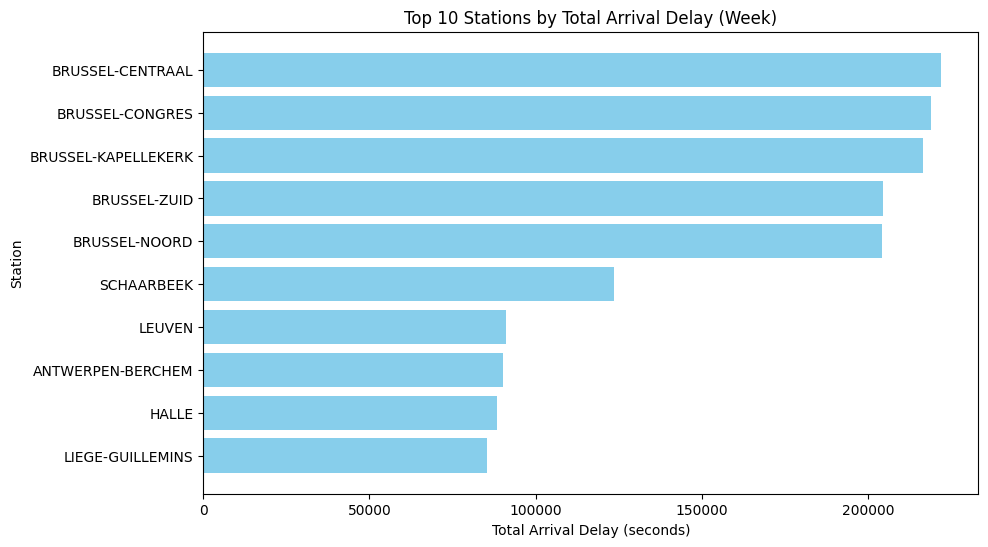

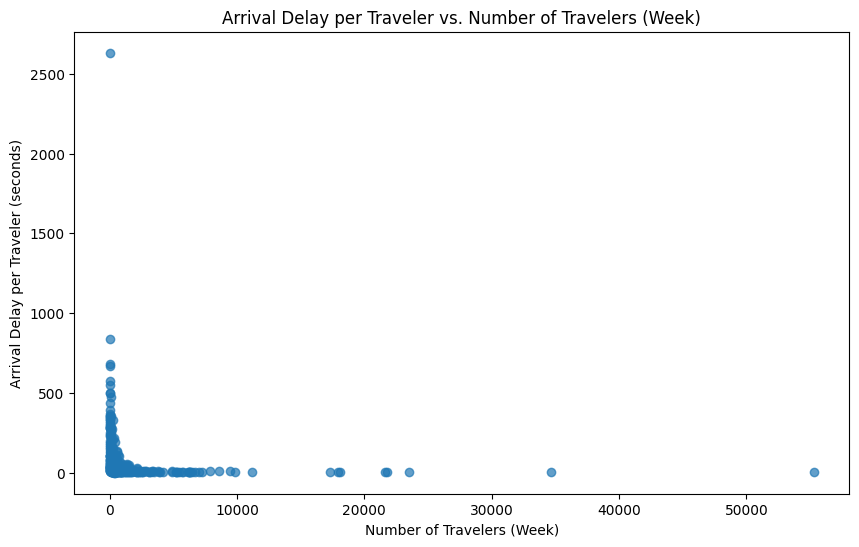

In [48]:
import matplotlib.pyplot as plt

# Calculate delay per traveler for arrival and departure (weekdays)
delay_with_travelers['arrival_delay_per_traveler_week'] = delay_with_travelers['Delay at arrival'] / delay_with_travelers['week']
delay_with_travelers['departure_delay_per_traveler_week'] = delay_with_travelers['Delay at departure'] / delay_with_travelers['week']

# Bar plot: stations with highest total arrival delay
top_arrival = delay_with_travelers.sort_values('Delay at arrival', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_arrival['Stopping place'], top_arrival['Delay at arrival'], color='skyblue')
plt.xlabel('Total Arrival Delay (seconds)')
plt.ylabel('Station')
plt.title('Top 10 Stations by Total Arrival Delay (Week)')
plt.gca().invert_yaxis()
plt.show()

# Scatter plot: delay per traveler vs. total travelers (week)
plt.figure(figsize=(10,6))
plt.scatter(delay_with_travelers['week'], delay_with_travelers['arrival_delay_per_traveler_week'], alpha=0.7)
plt.xlabel('Number of Travelers (Week)')
plt.ylabel('Arrival Delay per Traveler (seconds)')
plt.title('Arrival Delay per Traveler vs. Number of Travelers (Week)')
plt.show()

In [30]:
# Vertraging per reiziger op weekdagen
delay_with_travelers['Delay per traveler (arrival, week)'] = (
    delay_with_travelers['Delay at arrival'] / delay_with_travelers['week']
)
delay_with_travelers['Delay per traveler (departure, week)'] = (
    delay_with_travelers['Delay at departure'] / delay_with_travelers['week']
)

# Vertraging per reiziger op zaterdag
delay_with_travelers['Delay per traveler (arrival, sat)'] = (
    delay_with_travelers['Delay at arrival'] / delay_with_travelers['saturday']
)
delay_with_travelers['Delay per traveler (departure, sat)'] = (
    delay_with_travelers['Delay at departure'] / delay_with_travelers['saturday']
)

# Vertraging per reiziger op zondag
delay_with_travelers['Delay per traveler (arrival, sun)'] = (
    delay_with_travelers['Delay at arrival'] / delay_with_travelers['sunday']
)
delay_with_travelers['Delay per traveler (departure, sun)'] = (
    delay_with_travelers['Delay at departure'] / delay_with_travelers['sunday']
)


In [31]:
top_week = delay_with_travelers.sort_values(
    'Delay per traveler (arrival, week)', ascending=False
).head(10)

print(top_week[['Stopping place', 'Delay per traveler (arrival, week)', 'week']])


          Stopping place  Delay per traveler (arrival, week)   week
145      VERVIERS-PALAIS                         1070.000000    8.0
429              HOURPES                          282.000000    7.0
54              HILLEGEM                          187.796117  103.0
177           HERGENRATH                          169.976744   43.0
38                 WELLE                          169.203125  128.0
313  MASNUY-SAINT-PIERRE                          136.733333   30.0
110        CHAUDFONTAINE                          115.925532   94.0
212                GHLIN                          114.178571   56.0
121             FRAIPONT                          112.166667   90.0
195            ERBISOEUL                          111.666667   63.0


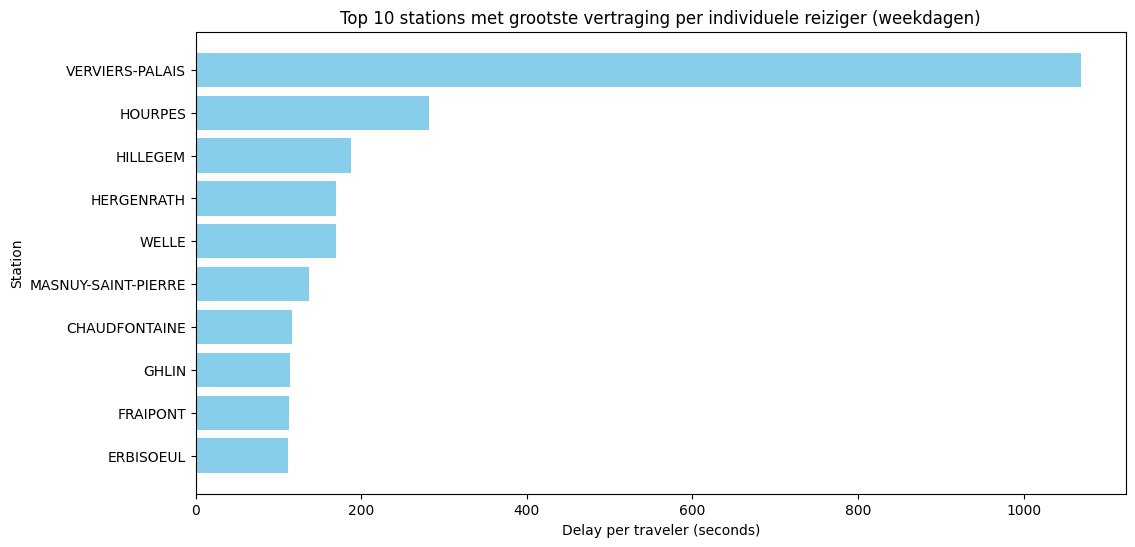

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.barh(top_week['Stopping place'], top_week['Delay per traveler (arrival, week)'], color='skyblue')
plt.xlabel('Delay per traveler (seconds)')
plt.ylabel('Station')
plt.title('Top 10 stations met grootste vertraging per individuele reiziger (weekdagen)')
plt.gca().invert_yaxis()  # hoogste bovenaan
plt.show()


In [33]:
delay_filtered = delay_with_travelers[delay_with_travelers['week'] >= 100]
top_week_filtered = delay_filtered.sort_values(
    'Delay per traveler (arrival, week)', ascending=False
).head(10)


In [34]:
delay_with_travelers['Total impact (arrival, week)'] = delay_with_travelers['Delay at arrival'] * delay_with_travelers['week']


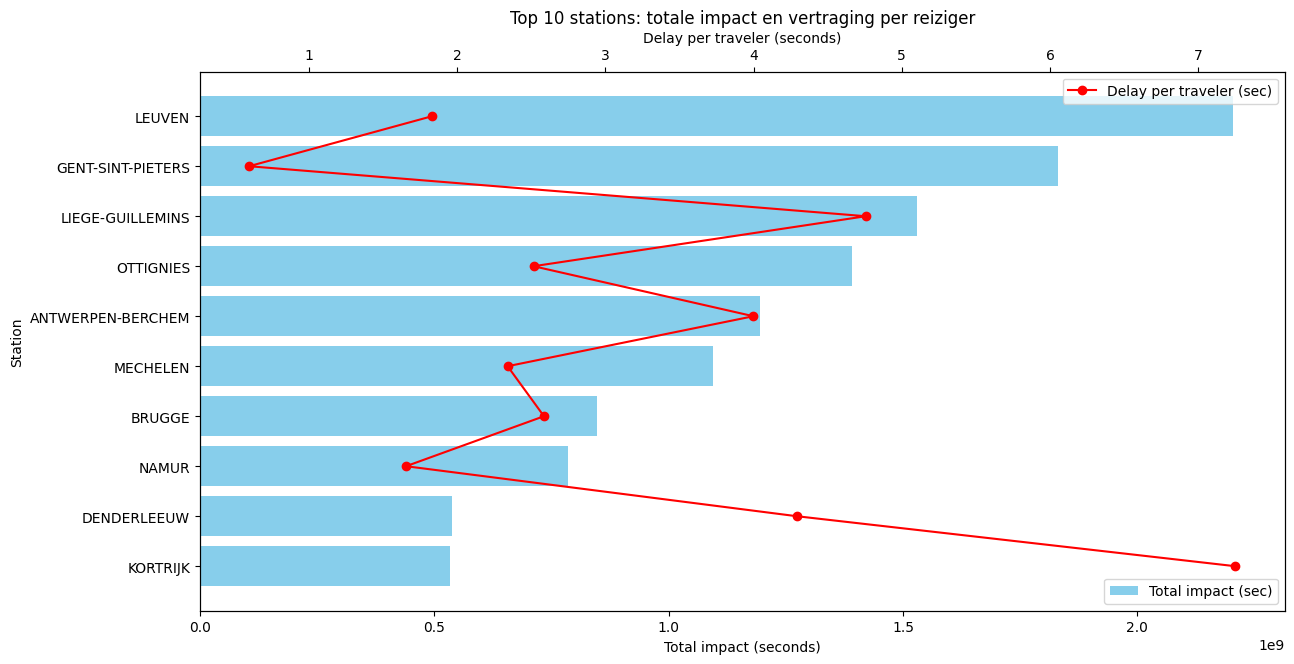

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Selecteer top 10 stations op totale impact
top_impact = delay_with_travelers.sort_values(
    'Total impact (arrival, week)', ascending=False
).head(10)

# Visualisatie
fig, ax1 = plt.subplots(figsize=(14,7))

# Bar chart: totale impact (collectief)
ax1.barh(top_impact['Stopping place'], top_impact['Total impact (arrival, week)'], color='skyblue', label='Total impact (sec)')

# Inverteer y-as zodat hoogste bovenaan staat
ax1.invert_yaxis()

# Labels
ax1.set_xlabel('Total impact (seconds)')
ax1.set_ylabel('Station')
ax1.set_title('Top 10 stations: totale impact en vertraging per reiziger')

# Voeg vertraging per reiziger toe als rode lijn
ax2 = ax1.twiny()  # secundaire x-as
ax2.plot(top_impact['Delay per traveler (arrival, week)'], top_impact['Stopping place'], 'ro-', label='Delay per traveler (sec)')
ax2.set_xlabel('Delay per traveler (seconds)')

# Voeg legenda toe
ax1.legend(loc='lower right')
ax2.legend(loc='upper right')

plt.show()


In [37]:
import pandas as pd

# Stel de datumkolom om naar datetime
trips['Date of departure'] = pd.to_datetime(trips['Date of departure'])

# Voeg dag van de week toe (0=maandag, 6=zondag)
trips['day_of_week'] = trips['Date of departure'].dt.dayofweek

# Voeg een dagtype toe
def get_day_type(d):
    if d < 5:
        return 'week'      # maandag t/m vrijdag
    elif d == 5:
        return 'saturday'
    else:
        return 'sunday'

trips['day_type'] = trips['day_of_week'].apply(get_day_type)


In [38]:
# Groepeer per station en dagtype
total_delay_per_station_daytype = trips.groupby(['Stopping place', 'day_type'])[['Delay at arrival','Delay at departure']].sum().reset_index()

print(total_delay_per_station_daytype.head(10))


     Stopping place day_type  Delay at arrival  Delay at departure
0             AALST     week           11376.0             11575.0
1  AALST-KERREBROEK     week             739.0               622.0
2            AALTER     week            5080.0             10956.0
3          AARSCHOT     week           21159.0             19099.0
4           AARSELE     week           12511.0             12627.0
5             ACREN     week            7192.0              7845.0
6            AISEAU     week           16812.0             16466.0
7             ALKEN     week            6741.0              8370.0
8              AMAY     week           17120.0             17474.0
9            AMPSIN     week           19471.0             19327.0


In [39]:
delay_with_travelers = pd.merge(
    total_delay_per_station_daytype,
    travelers_df,
    left_on='Stopping place',
    right_on='Station',
    how='left'
)


In [41]:
# Groepeer per station en dagtype
total_delay_per_station_daytype = trips.groupby(
    ['Stopping place', 'day_type']
)[['Delay at arrival','Delay at departure']].sum().reset_index()

# Bekijk output
print(total_delay_per_station_daytype.head(10))


     Stopping place day_type  Delay at arrival  Delay at departure
0             AALST     week           11376.0             11575.0
1  AALST-KERREBROEK     week             739.0               622.0
2            AALTER     week            5080.0             10956.0
3          AARSCHOT     week           21159.0             19099.0
4           AARSELE     week           12511.0             12627.0
5             ACREN     week            7192.0              7845.0
6            AISEAU     week           16812.0             16466.0
7             ALKEN     week            6741.0              8370.0
8              AMAY     week           17120.0             17474.0
9            AMPSIN     week           19471.0             19327.0


In [45]:
import pandas as pd
import glob
import os
from collections import defaultdict
from datetime import datetime

# Path to the Trips folder
trips_folder = './Data/Trips/'

# Find all trip CSV files
trip_files = glob.glob(os.path.join(trips_folder, 'Trips_*.csv'))

# Prepare a nested dict: {station: {day: {'arrival': sum, 'departure': sum}}}
station_day_delay = defaultdict(lambda: defaultdict(lambda: {'arrival': 0, 'departure': 0}))

for file in trip_files:
    df = pd.read_csv(file, sep=';')
    # Verwijder rijen waar de trein niet effectief stopt
    trips_stops = df[~((df['Actual arrival time'] == df['Actual departure time']) & (df['Planned arrival time'] == df['Planned departure time']))].copy()
    print(f"{os.path.basename(file)}: vóór filtering = {len(df)}, na filtering = {len(trips_stops)}")
    # Parse date column to get day name
    trips_stops['Date of departure'] = pd.to_datetime(trips_stops['Date of departure'])
    trips_stops['day_name'] = trips_stops['Date of departure'].dt.day_name()
    for _, row in trips_stops.iterrows():
        station = row['Stopping place']
        day = row['day_name']
        station_day_delay[station][day]['arrival'] += row['Delay at arrival']
        station_day_delay[station][day]['departure'] += row['Delay at departure']

# Build a DataFrame: columns = ['Stopping place', 'Monday_arrival_delay', 'Monday_departure_delay', ...]
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data = []
for station, day_dict in station_day_delay.items():
    row = {'Stopping place': station}
    for day in days:
        row[f'{day}_arrival_delay'] = day_dict[day]['arrival']
        row[f'{day}_departure_delay'] = day_dict[day]['departure']
    data.append(row)
delay_table = pd.DataFrame(data)
delay_table = delay_table.sort_values('Stopping place').reset_index(drop=True)
delay_table.head()

Trips_22_09_2025.csv: vóór filtering = 75069, na filtering = 45262
Trips_23_09_2025.csv: vóór filtering = 76350, na filtering = 46116
Trips_24_09_2025.csv: vóór filtering = 77048, na filtering = 46578
Trips_25_09_2025.csv: vóór filtering = 76096, na filtering = 46071
Trips_26_09_2025.csv: vóór filtering = 75380, na filtering = 45596
Trips_27_09_2025.csv: vóór filtering = 41570, na filtering = 24682
Trips_28_09_2025.csv: vóór filtering = 40786, na filtering = 23704


,Stopping place,Monday_arrival_delay,Monday_departure_delay,Tuesday_arrival_delay,Tuesday_departure_delay,Wednesday_arrival_delay,Wednesday_departure_delay,Thursday_arrival_delay,Thursday_departure_delay,Friday_arrival_delay,Friday_departure_delay,Saturday_arrival_delay,Saturday_departure_delay,Sunday_arrival_delay,Sunday_departure_delay
0,AALST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AALST-KERREBROEK,676.0,659.0,269.0,305.0,617.0,606.0,520.0,456.0,517.0,604.0,0.0,0.0,0.0,0.0
2,AALTER,2545.0,8421.0,743.0,6831.0,1224.0,7389.0,3852.0,9609.0,3728.0,8920.0,915.0,5685.0,1638.0,7665.0
3,AARSCHOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AARSELE,861.0,977.0,3022.0,3021.0,511.0,501.0,1009.0,1147.0,1008.0,1102.0,0.0,0.0,0.0,0.0


In [46]:
trips.query("`Stopping place` == 'AARSCHOT'")

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date,day_of_week,day_type
7,2025-09-22,2466,L 03,SNCB/NMBS,35,16:28:48,16:34:01,16:26:00,16:28:00,168.0,362.0,L 03: LEUVEN -> HASSELT,AARSCHOT,35,2025-09-22,2025-09-22,2025-09-22,2025-09-22,0,week
563,2025-09-22,2458,L 03,SNCB/NMBS,35,08:32:57,08:34:02,08:26:00,08:28:00,418.0,362.0,L 03: LEUVEN -> HASSELT,AARSCHOT,35,2025-09-22,2025-09-22,2025-09-22,2025-09-22,0,week
708,2025-09-22,2891,L 23,SNCB/NMBS,35,20:13:25,20:15:16,20:10:00,20:11:00,205.0,256.0,L 23: LEUVEN -> ANTWERPEN-CENTRAAL,AARSCHOT,35,2025-09-22,2025-09-22,2025-09-22,2025-09-22,0,week
861,2025-09-22,2457,L 03,SNCB/NMBS,35,07:26:23,07:27:51,07:26:00,07:28:00,24.0,-8.0,L 03: LEUVEN -> HASSELT,AARSCHOT,35,2025-09-22,2025-09-22,2025-09-22,2025-09-22,0,week
921,2025-09-22,2859,L 23,SNCB/NMBS,35,10:48:57,10:49:43,10:47:00,10:49:00,117.0,43.0,L 23: ANTWERPEN-CENTRAAL -> LEUVEN,AARSCHOT,35,2025-09-22,2025-09-22,2025-09-22,2025-09-22,0,week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67623,2025-09-22,2635,IC 08,SNCB/NMBS,35,14:01:35,14:03:02,14:01:00,14:02:00,36.0,63.0,IC 08: HASSELT -> ANTWERPEN-CENTRAAL,AARSCHOT,35,2025-09-22,2025-09-22,2025-09-22,2025-09-22,0,week
67701,2025-09-22,2612,IC 08,SNCB/NMBS,35,13:54:24,13:57:04,13:54:00,13:57:00,24.0,4.0,IC 08: ANTWERPEN-CENTRAAL -> HASSELT,AARSCHOT,35,2025-09-22,2025-09-22,2025-09-22,2025-09-22,0,week
67932,2025-09-22,2637,IC 08,SNCB/NMBS,35,16:00:55,16:02:27,16:01:00,16:02:00,-5.0,27.0,IC 08: HASSELT -> ANTWERPEN-CENTRAAL,AARSCHOT,35,2025-09-22,2025-09-22,2025-09-22,2025-09-22,0,week
68050,2025-09-22,2610,IC 08,SNCB/NMBS,35,11:53:16,11:57:02,11:54:00,11:57:00,-44.0,2.0,IC 08: ANTWERPEN-CENTRAAL -> HASSELT,AARSCHOT,35,2025-09-22,2025-09-22,2025-09-22,2025-09-22,0,week
